#### Import Libraries

In [1]:
import pandas as pd
#pandas alies as pd
import numpy as np
#numpy alies as np
import matplotlib.pyplot as plt
#matplotlib alies as plt
import seaborn as sns
#seaborn alies as sns

#### load the dataset

In [2]:
df=pd.read_csv('oil_spill.csv')
df.head()

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
0,1,2558,1506.09,456.63,90,6395000,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0


#### Information of Data

In [3]:
df.shape

(937, 50)

In [4]:
df.columns

Index(['f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7', 'f_8', 'f_9', 'f_10',
       'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16', 'f_17', 'f_18', 'f_19',
       'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25', 'f_26', 'f_27', 'f_28',
       'f_29', 'f_30', 'f_31', 'f_32', 'f_33', 'f_34', 'f_35', 'f_36', 'f_37',
       'f_38', 'f_39', 'f_40', 'f_41', 'f_42', 'f_43', 'f_44', 'f_45', 'f_46',
       'f_47', 'f_48', 'f_49', 'target'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 50 columns):
f_1       937 non-null int64
f_2       937 non-null int64
f_3       937 non-null float64
f_4       937 non-null float64
f_5       937 non-null int64
f_6       937 non-null int64
f_7       937 non-null float64
f_8       937 non-null float64
f_9       937 non-null float64
f_10      937 non-null float64
f_11      937 non-null float64
f_12      937 non-null float64
f_13      937 non-null float64
f_14      937 non-null float64
f_15      937 non-null float64
f_16      937 non-null float64
f_17      937 non-null float64
f_18      937 non-null float64
f_19      937 non-null float64
f_20      937 non-null float64
f_21      937 non-null float64
f_22      937 non-null float64
f_23      937 non-null int64
f_24      937 non-null float64
f_25      937 non-null float64
f_26      937 non-null float64
f_27      937 non-null float64
f_28      937 non-null float64
f_29      937 non-null float64
f_30  

#### Handling the null values

In [6]:
nv=df.isnull().sum()
nv[nv>0]

Series([], dtype: int64)

#### checking the datatype

In [7]:
df.dtypes.value_counts()

float64    39
int64      11
dtype: int64

#### Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
Feature=df.loc[:,'f_2':'f_49']
scaler=StandardScaler()
scaled_feature=scaler.fit_transform(Feature)

#### Extracting categorical columns

In [10]:
cat_col=df.dtypes[df.dtypes=='object']
print(cat_col)

Series([], dtype: object)


#### checking the target Variables

In [11]:
df['target'].value_counts()

0    896
1     41
Name: target, dtype: int64

In [12]:
#1)As we can see from the above information that there is no null values.
#2)and also there is no columns with datatype ->object.

#So we can conclude that there is no need of Data cleaning and data preprocessing


#### Correlation

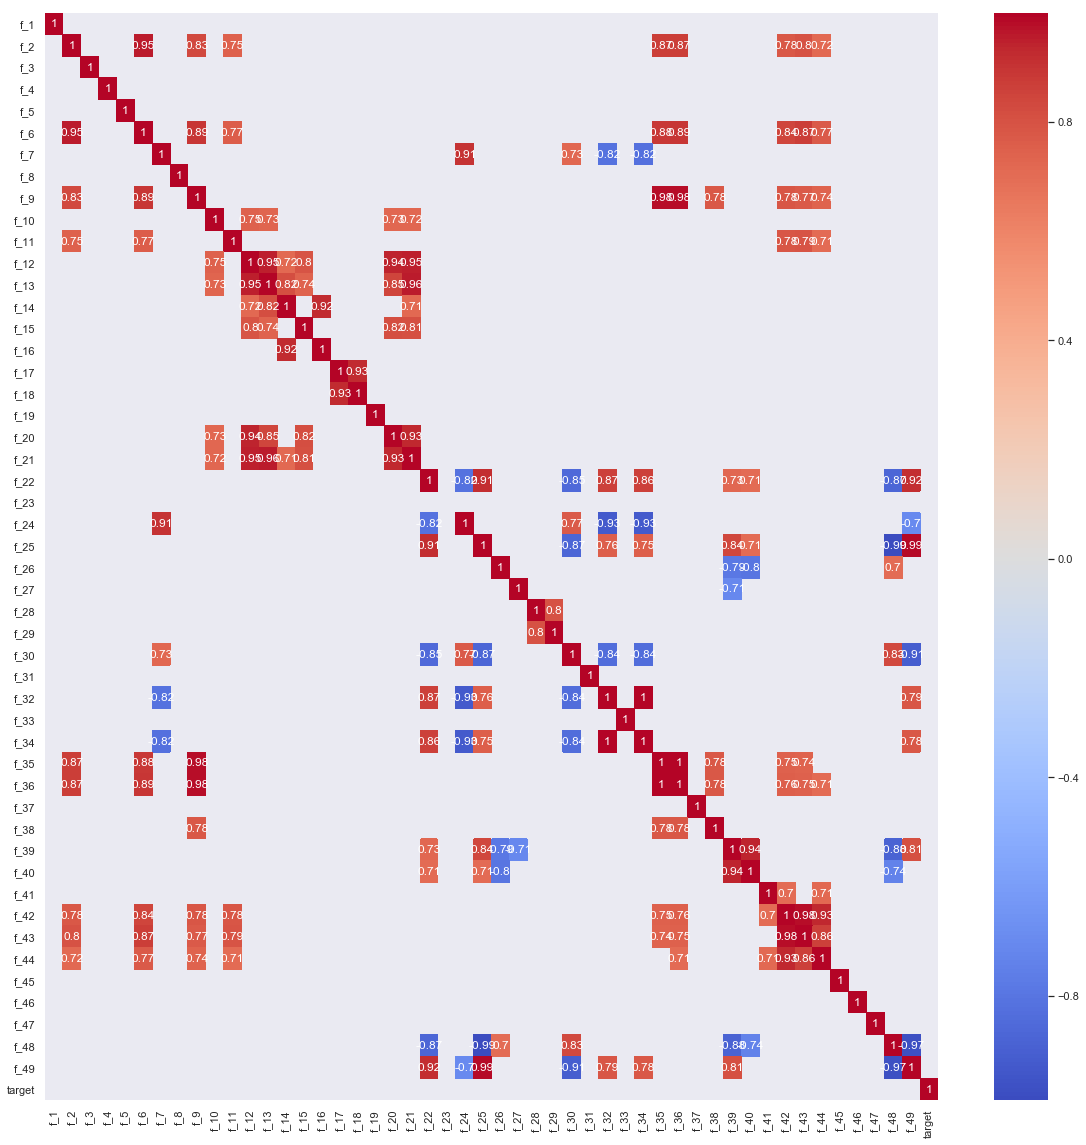

In [13]:
corr=df.corr()
sns.set(rc={'figure.figsize':(20,20)})
corr=corr[abs(corr)>=0.7]
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

#### Selecting Dependent and independent Features

In [14]:
x=df.drop(['target'],axis=1)
y=df['target']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(937, 49)
(937,)


#### Splitting Data into training and test Data

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(749, 49)
(188, 49)
(749,)
(188,)


In [16]:
print(type(x_train),type(x_test))
print(type(y_train),type(y_test))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [17]:
x_train.head()

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_40,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49
710,63,15,114.20,623.27,172,121500,74.27,9.33,1191.0,0.13,...,73,636.40,180.00,90.00,73.48,7.07,0,3249.90,66.20,6.20
779,47,16,226.81,287.06,73,129600,47.81,5.01,1461.0,0.10,...,50,742.16,90.00,67.50,41.66,10.99,1,7894.38,65.80,6.89
174,166,99,1708.19,1232.37,146,247500,36.68,8.16,2910.0,0.22,...,55,651.92,430.12,295.52,99.67,2.21,0,4056.61,66.17,8.01
405,138,130,1355.46,1068.25,91,325000,37.44,8.13,2990.0,0.22,...,63,900.00,550.00,305.56,136.00,2.95,0,5486.65,66.01,7.59
796,64,12,18.25,389.17,60,97200,48.25,7.64,1138.0,0.16,...,50,649.00,127.28,21.21,51.96,30.59,1,2338.89,65.85,6.13


In [18]:
y_train.head()

710    0
779    1
174    0
405    0
796    0
Name: target, dtype: int64

#### Creating a function to generate Regession Metrics

In [19]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
def reg_eval_metrics(y,ypred):
    mae=mean_absolute_error(y,ypred)
    mse=mean_squared_error(y,ypred)
    rmse=np.sqrt(mean_squared_error(y,ypred))
    r2sc=r2_score(y,ypred)
    print('mae',mae)
    print('mse',mse)
    print('rmse',rmse)
    print('r2score',r2sc)
    
#r2 score for training testing data
def train_test_scr(model):
    print('Training Score',model.score(x_train,y_train))
    print('Testing Score',model.score(x_test,y_test))

#### Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [21]:
m1=LinearRegression()
m1.fit(x_train,y_train)

LinearRegression()

#### generate the Prediction

In [22]:
ypred=m1.predict(x_test)

In [23]:
train_test_scr(m1)

Training Score 0.4411780330582018
Testing Score 0.28186333982838796


In [24]:
reg_eval_metrics(y_test,ypred)

mae 0.08670561576222245
mse 0.032733085093268076
rmse 0.18092287056441503
r2score 0.28186333982838796


In [25]:
df1=pd.DataFrame()

In [26]:
df1['y predict']=ypred
df1.head()

,y predict
0,-0.064981
1,-0.001271
2,0.097940
3,-0.007096
4,0.137194


#### Lasso Regression

In [27]:
lasso_reg=Lasso(alpha=10)
lasso_reg.fit(x_train,y_train)


Lasso(alpha=10)

In [28]:
ypred1=lasso_reg.predict(x_test)

In [29]:
train_test_scr(lasso_reg)

Training Score 0.22979139065234877
Testing Score 0.2451855132039349


In [30]:
reg_eval_metrics(y_test,ypred1)

mae 0.08109082431433166
mse 0.034404881683693433
rmse 0.1854855295803245
r2score 0.2451855132039349


#### Ridge Regression

In [31]:
ridge_reg=Ridge(alpha=10)
ridge_reg.fit(x_train,y_train)

Ridge(alpha=10)

In [32]:
ypred2=ridge_reg.predict(x_test)

In [33]:
train_test_scr(ridge_reg)

Training Score 0.4280378818959225
Testing Score 0.24268368550736297


In [34]:
reg_eval_metrics(y_test,ypred2)

mae 0.08909365465924879
mse 0.03451891643978152
rmse 0.1857926705760524
r2score 0.24268368550736297


### Classification

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report

In [36]:
def eval_model(y_test,ypred):
    cm=confusion_matrix(y_test,ypred)
    print(cm)
    print('classification report',classification_report(y_test,ypred))
    print('accuracy score',accuracy_score(y_test,ypred))
    
def mscore(model):
    print('Training Score',model.score(x_train,y_train))
    print('Testing Score',model.score(x_test,y_test))    

#### Logistic Regression

In [37]:
m3=LogisticRegression()
m3.fit(x_train,y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [38]:
ypred3=m3.predict(x_test)

In [39]:
eval_model(y_test,ypred3)

[[178   1]
 [  9   0]]
classification report               precision    recall  f1-score   support

           0       0.95      0.99      0.97       179
           1       0.00      0.00      0.00         9

    accuracy                           0.95       188
   macro avg       0.48      0.50      0.49       188
weighted avg       0.91      0.95      0.93       188

accuracy score 0.9468085106382979


In [40]:
mscore(m3)

Training Score 0.9612817089452603
Testing Score 0.9468085106382979


#### Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)
ypred4=clf.predict(x_test)

In [43]:
eval_model(y_test,ypred4)

[[174   5]
 [  6   3]]
classification report               precision    recall  f1-score   support

           0       0.97      0.97      0.97       179
           1       0.38      0.33      0.35         9

    accuracy                           0.94       188
   macro avg       0.67      0.65      0.66       188
weighted avg       0.94      0.94      0.94       188

accuracy score 0.9414893617021277


In [44]:
mscore(clf)

Training Score 1.0
Testing Score 0.9414893617021277


#### Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [47]:
ypred5=rfc.predict(x_test)

In [48]:
eval_model(y_test,ypred5)

[[179   0]
 [  8   1]]
classification report               precision    recall  f1-score   support

           0       0.96      1.00      0.98       179
           1       1.00      0.11      0.20         9

    accuracy                           0.96       188
   macro avg       0.98      0.56      0.59       188
weighted avg       0.96      0.96      0.94       188

accuracy score 0.9574468085106383


In [49]:
mscore(rfc)

Training Score 1.0
Testing Score 0.9574468085106383


#### KNN

In [50]:
from sklearn.neighbors import KNeighborsClassifier
neigh=KNeighborsClassifier()
neigh.fit(x_train,y_train)

KNeighborsClassifier()

In [51]:
ypred6=neigh.predict(x_test)

In [52]:
eval_model(y_test,ypred6)

[[179   0]
 [  8   1]]
classification report               precision    recall  f1-score   support

           0       0.96      1.00      0.98       179
           1       1.00      0.11      0.20         9

    accuracy                           0.96       188
   macro avg       0.98      0.56      0.59       188
weighted avg       0.96      0.96      0.94       188

accuracy score 0.9574468085106383


In [53]:
mscore(neigh)

Training Score 0.9612817089452603
Testing Score 0.9574468085106383


### Bagging Classifier

In [54]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [55]:
def eval_model(y_test,ypred):
    cm=confusion_matrix(y_test,ypred)
    print(cm)
    print('classification report',classification_report(y_test,ypred))
    print('accuracy score',accuracy_score(y_test,ypred))
    
def mscore(model):
    print('Training Score',model.score(x_train,y_train))
    print('Testing Score',model.score(x_test,y_test))

In [56]:
dt=DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_split=20)

#### Model Building in Bagging Classifier

In [57]:
bc_dt=BaggingClassifier(base_estimator=dt,n_estimators=15,max_samples=x.shape[0],max_features=x.shape[1],random_state=100)
bc_dt.fit(x,y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                        min_samples_split=20),
                  max_features=49, max_samples=937, n_estimators=15,
                  random_state=100)

In [58]:
mscore(bc_dt)

Training Score 0.9773030707610146
Testing Score 0.9627659574468085


#### Reading the test dataset

In [59]:
x_test.head()

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_40,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49
143,133,50,1687.60,1498.74,9,125000,37.34,7.30,1980.0,0.20,...,55,509.90,304.14,207.43,66.43,2.46,0,3423.55,66.30,7.89
229,76,76,1010.70,741.46,84,190000,31.83,5.22,2880.0,0.16,...,39,1154.34,304.14,115.40,80.83,10.00,0,5442.91,65.81,7.32
116,106,116,780.74,1650.50,106,290000,36.33,9.36,3380.0,0.26,...,55,1298.08,316.23,175.10,86.84,7.41,0,11823.49,66.25,6.76
134,124,62,1697.23,1330.31,28,155000,37.00,7.42,2180.0,0.20,...,55,670.82,335.41,117.61,100.69,5.70,0,4148.59,66.22,7.96
596,28,31,278.06,221.13,142,251100,46.42,13.41,2276.0,0.29,...,67,1026.16,254.56,70.71,92.47,14.51,0,13758.25,65.73,7.12


In [60]:
x_test.shape

(188, 49)

#### Generate the Prediction for the test dataset

In [61]:
y_pred=bc_dt.predict(x_test)

In [62]:
print(y_pred.shape)

(188,)


#### Creating a resultant dataframe for the prediction results

In [63]:
res=pd.DataFrame({'taget':y_pred})
res.head()

,taget
0,0
1,0
2,0
3,0
4,0


#### Save and load the best model

In [65]:
import joblib
best_model=res
joblib.dump(best_model,'best_model.pkl')

['best_model.pkl']

#### Load the the saved model

In [67]:
loaded_model=joblib.load('best_model.pkl')

### From the analysis of the model we conclude that Bagging is best model.